# Draw optical picture

## XMM Newton Observation of M31

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last' #'all'

In [3]:
import numpy as np
#import astropy
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle


from astroquery.skyview import SkyView

Observation list of XMM-Newton can be fectch from http://nxsa.esac.esa.int/nxsa-web/#search  

In [4]:

XMM=Table.read("/Users/rhuang/Desktop/桌面/XMM/M31/M31-3degree.csv") 
XMM

<Table masked=True length=153>
OBSERVATION.OBSERVATION_ID ... OBSERVATION.OBSERVATION_DISTANCE_EQUATORIAL
          int64            ...                   float64                  
-------------------------- ... -------------------------------------------
                  65770101 ...                                      152.36
                 109270101 ...                                        0.44
                 109270301 ...                                       49.49
                 109270401 ...                                       74.32
                 109270501 ...                                        0.44
                 109270701 ...                                       24.49
                 109270801 ...                                       49.49
                 109270901 ...                                       74.32
                 112570101 ...                                        0.44
                 112570201 ...                                        25.4
                       ... ...                                         ...
                 800732101 ...                                       69.79
                 800732401 ...                                       86.88
                 800732301 ...                                       71.91
                 800732501 ...                                       85.53
                 800732201 ...                                        68.4
                 800732701 ...                                      104.33
                 800732601 ...                                       102.7
                 800732801 ...                                      112.72
                 800732901 ...                                      121.23
                 800733001 ...                                       120.9

/Users/rhuang/software/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


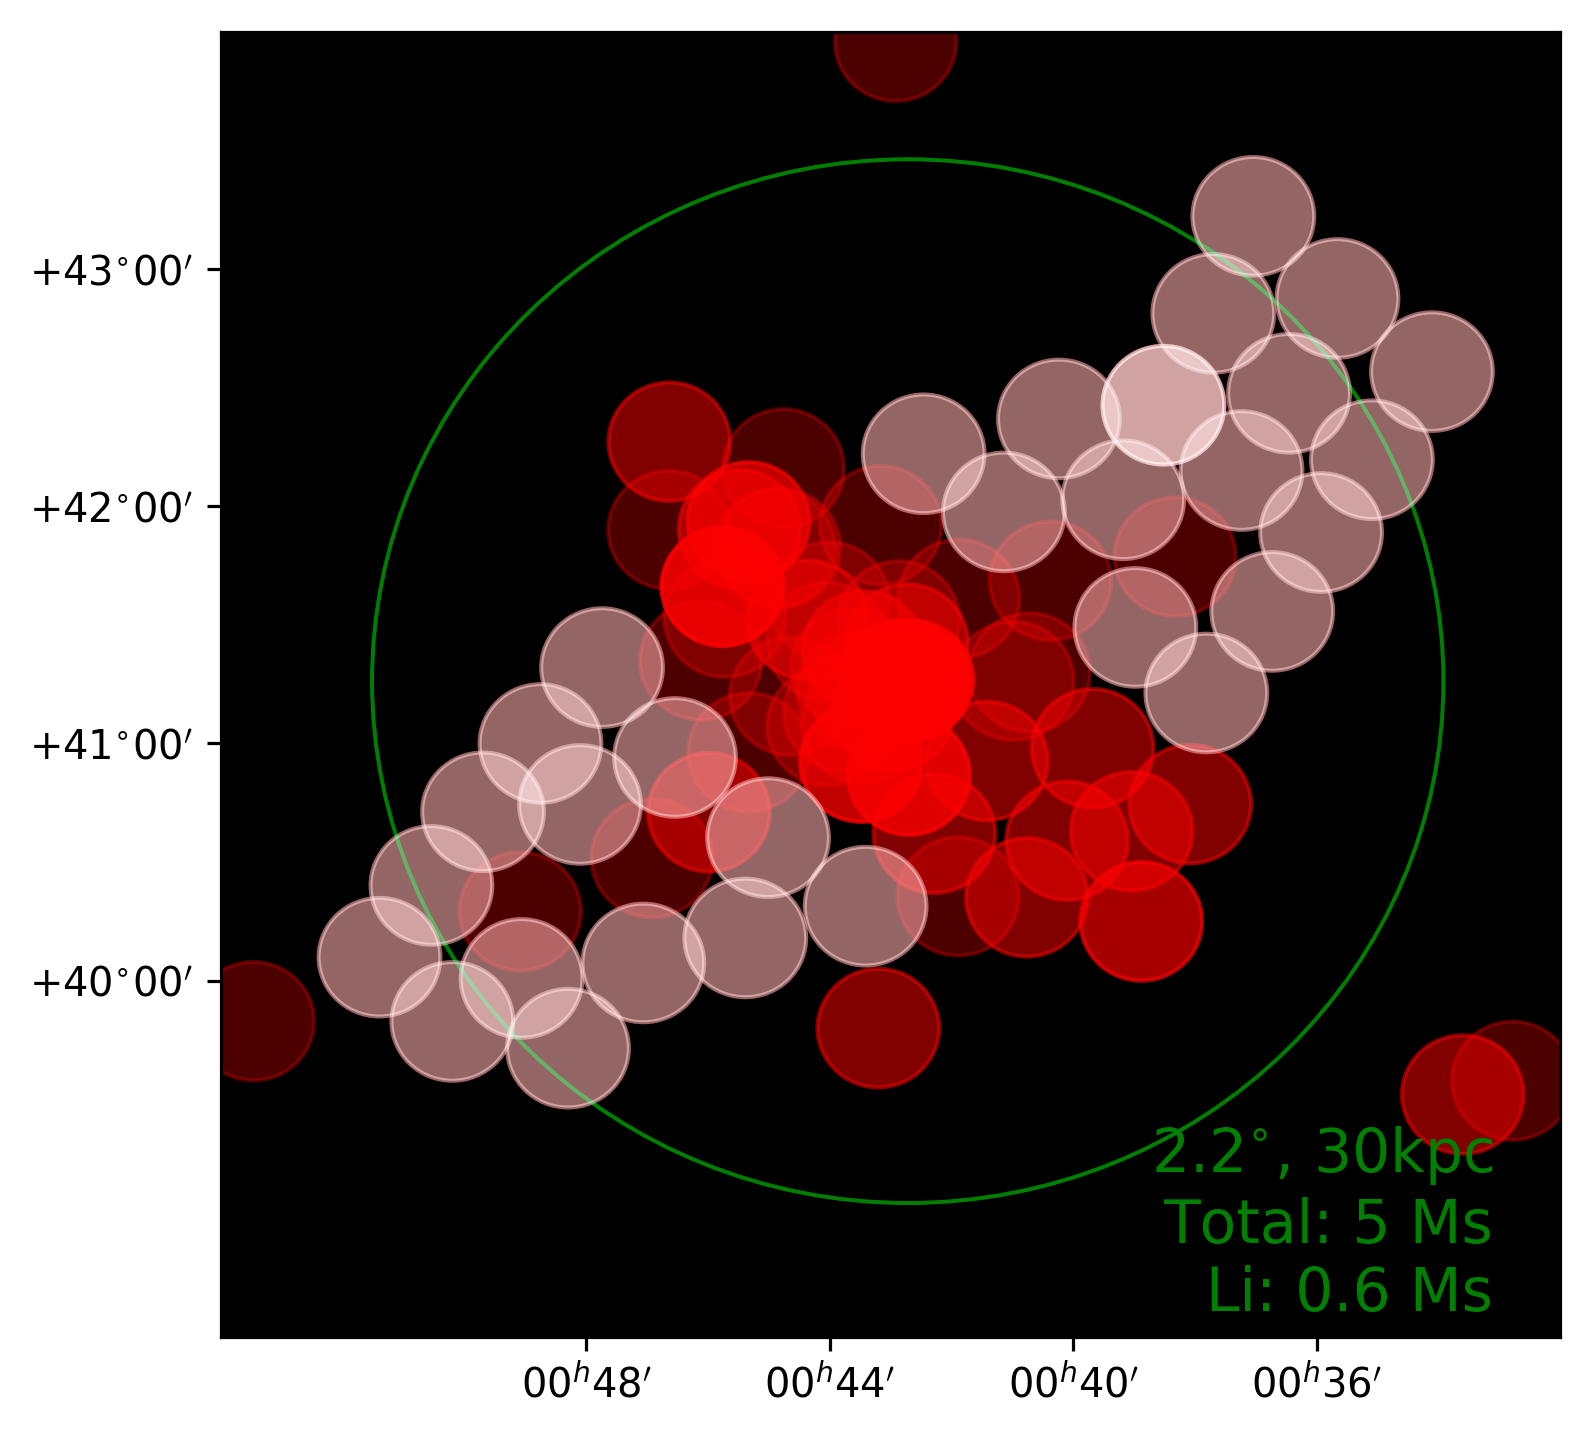

In [5]:

h = SkyCoord(XMM['OBSERVATION.RA_NOM'], XMM['OBSERVATION.DEC_NOM'], frame='icrs',unit='deg')
fig, ax = plt.subplots(figsize=(6,6),dpi=72*4)
ax.set_facecolor('k')
for i in range(h.ra.shape[0]):
    circle1 = plt.Circle((h.ra.degree[i], h.dec.degree[i]), 15./60., color='r',alpha = 0.3,linewidth=1,linestyle='-',fill=True);
    ax.add_artist(circle1);
ax.set_ylim([38,45])
ax.set_xlim([7,14])
ax.invert_xaxis()
#ax.axis('equal')
circle1 = plt.Circle((h.ra.degree[1], h.dec.degree[1]), 2.2, color='g',alpha = 0.99,fill=False);
ax.add_artist(circle1);
plt.grid('off')

XMM_Li = XMM[XMM['PROPOSAL.PI_SURNAME']=='Li']
h_li = SkyCoord(XMM_Li['OBSERVATION.RA_NOM'], XMM_Li['OBSERVATION.DEC_NOM'], frame='icrs',unit='deg')
for i in range(h_li.ra.shape[0]):
    circle1 = plt.Circle((h_li.ra.degree[i], h_li.dec.degree[i]), 15./60., color='w',alpha = 0.4,linewidth=1,linestyle='-',fill=True);
    ax.add_artist(circle1);
    
ax.set_xticks([9,10,11,12])
ax.set_xticklabels(['00$^h$36$\'$','00$^h$40$\'$','00$^h$44$\'$','00$^h$48$\'$']) 
ax.set_yticks([40, 41, 42, 43])
ax.set_yticklabels(['+40$^{\circ}$00$\'$', '+41$^{\circ}$00$\'$', '+42$^{\circ}$00$\'$', '+43$^{\circ}$00$\'$']) 
ax.set_xlim([8.0,13.5])
ax.set_ylim([38.5,44])

ax.set_xlim([8.0,13.5])
ax.set_ylim([38.5,44])
ax.invert_xaxis()
plt.grid('off')

ax.text(0.95, 0.01, '2.2$^{\circ}$, 30kpc\nTotal: 5 Ms\nLi: 0.6 Ms',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

#ax.text(0,0,'Total Exposure Time: '+str(np.sum(XMM['OBSERVATION.DURATION'])))

plt.show()

In [6]:
print('Total :',np.sum(XMM['OBSERVATION.DURATION']))
print('Li :',np.sum(XMM[XMM['PROPOSAL.PI_SURNAME']=='Li']['OBSERVATION.DURATION']))


Total : 5098638
Li : 605748


## Draw optical image of M31 with astroquery.skyview

### Function Dependencies
I steal from http://astroweb.case.edu/jakub/TA/Query_databases.html

In [7]:
#
# Written by Min-Su Shin
# Department of Astronomy, University of Michigan (2009 - )
# Department of Astrophysical Sciences, Princeton University (2005 - 2009)
#
# You can freely use the code.
#
# steal from http://astroweb.case.edu/jakub/TA/Query_databases.html

import numpy
import math

def sky_median_sig_clip(input_arr, sig_fract, percent_fract, max_iter=100, low_cut=True, high_cut=True):
	"""Estimating a sky value for a given number of iterations

	@type input_arr: numpy array
	@param input_arr: image data array
	@type sig_fract: float
	@param sig_fract: fraction of sigma clipping
	@type percent_fract: float
	@param percent_fract: convergence fraction
	@type max_iter: integer
	@param max_iter: max. of iterations
	@type low_cut: boolean
	@param low_cut: cut out only low values
	@type high_cut: boolean
	@param high_cut: cut out only high values
	@rtype: tuple
	@return: (sky value, number of iterations)

	"""
	work_arr = numpy.ravel(input_arr)
	old_sky = numpy.median(work_arr)
	sig = work_arr.std()
	upper_limit = old_sky + sig_fract * sig
	lower_limit = old_sky - sig_fract * sig
	if low_cut and high_cut:
		indices = numpy.where((work_arr < upper_limit) & (work_arr > lower_limit))
	else:
		if low_cut:
			indices = numpy.where((work_arr > lower_limit))
		else:
			indices = numpy.where((work_arr < upper_limit))
	work_arr = work_arr[indices]
	new_sky = numpy.median(work_arr)
	iteration = 0
	while ((math.fabs(old_sky - new_sky)/new_sky) > percent_fract) and (iteration < max_iter) :
		iteration += 1
		old_sky = new_sky
		sig = work_arr.std()
		upper_limit = old_sky + sig_fract * sig
		lower_limit = old_sky - sig_fract * sig
		if low_cut and high_cut:
			indices = numpy.where((work_arr < upper_limit) & (work_arr > lower_limit))
		else:
			if low_cut:
				indices = numpy.where((work_arr > lower_limit))
			else:
				indices = numpy.where((work_arr < upper_limit))
		work_arr = work_arr[indices]
		new_sky = numpy.median(work_arr)
	return (new_sky, iteration)



def sky_mean_sig_clip(input_arr, sig_fract, percent_fract, max_iter=100, low_cut=True, high_cut=True):
	"""Estimating a sky value for a given number of iterations

	@type input_arr: numpy array
	@param input_arr: image data array
	@type sig_fract: float
	@param sig_fract: fraction of sigma clipping
	@type percent_fract: float
	@param percent_fract: convergence fraction
	@type max_iter: integer
	@param max_iter: max. of iterations
	@type low_cut: boolean
	@param low_cut: cut out only low values
	@type high_cut: boolean
	@param high_cut: cut out only high values
	@rtype: tuple
	@return: (sky value, number of iterations)

	"""
	work_arr = numpy.ravel(input_arr)
	old_sky = numpy.mean(work_arr)
	sig = work_arr.std()
	upper_limit = old_sky + sig_fract * sig
	lower_limit = old_sky - sig_fract * sig
	if low_cut and high_cut:
		indices = numpy.where((work_arr < upper_limit) & (work_arr > lower_limit))
	else:
		if low_cut:
			indices = numpy.where((work_arr > lower_limit))
		else:
			indices = numpy.where((work_arr < upper_limit))
	work_arr = work_arr[indices]
	new_sky = numpy.mean(work_arr)
	iteration = 0
	while ((math.fabs(old_sky - new_sky)/new_sky) > percent_fract) and (iteration < max_iter) :
		iteration += 1
		old_sky = new_sky
		sig = work_arr.std()
		upper_limit = old_sky + sig_fract * sig
		lower_limit = old_sky - sig_fract * sig
		if low_cut and high_cut:
			indices = numpy.where((work_arr < upper_limit) & (work_arr > lower_limit))
		else:
			if low_cut:
				indices = numpy.where((work_arr > lower_limit))
			else:
				indices = numpy.where((work_arr < upper_limit))
		work_arr = work_arr[indices]
		new_sky = numpy.mean(work_arr)
	return (new_sky, iteration)



def range_from_zscale(input_arr, contrast = 1.0, sig_fract = 3.0, percent_fract = 0.01, max_iter=100, low_cut=True, high_cut=True):
	"""Estimating ranges with the zscale algorithm

	@type input_arr: numpy array
	@param input_arr: image data array as sample pixels to derive z-ranges
	@type contrast: float
	@param contrast: zscale contrast which should be larger than 0.
	@type sig_fract: float
	@param sig_fract: fraction of sigma clipping
	@type percent_fract: float
	@param percent_fract: convergence fraction
	@type max_iter: integer
	@param max_iter: max. of iterations
	@type low_cut: boolean
	@param low_cut: cut out only low values
	@type high_cut: boolean
	@param high_cut: cut out only high values
	@rtype: tuple
	@return: (min. value, max. value, number of iterations)

	"""
	work_arr = numpy.ravel(input_arr)
	work_arr = numpy.sort(work_arr) # sorting is done.
	max_ind = len(work_arr) - 1
	midpoint_ind = int(len(work_arr)*0.5)
	I_midpoint = work_arr[midpoint_ind]
	print(".. midpoint index ", midpoint_ind, " I_midpoint ", I_midpoint)
	# initial estimation of the slope
	x = numpy.array(list(range(0, len(work_arr)))) - midpoint_ind
	y = numpy.array(work_arr)
	temp = numpy.vstack([x, numpy.ones(len(x))]).T
	slope, intercept = numpy.linalg.lstsq(temp, y)[0]
	old_slope = slope
	print("... slope & intercept ", old_slope, " ", intercept)
	# initial clipping
	sig = y.std()
	upper_limit = I_midpoint + sig_fract * sig
	lower_limit = I_midpoint - sig_fract * sig
	if low_cut and high_cut:
		indices = numpy.where((work_arr < upper_limit) & (work_arr > lower_limit))
	else:
		if low_cut:
			indices = numpy.where((work_arr > lower_limit))
		else:
			indices = numpy.where((work_arr < upper_limit))
	# new estimation of the slope
	x = numpy.array(indices[0]) - midpoint_ind
	y = numpy.array(work_arr[indices])
	temp = numpy.vstack([x, numpy.ones(len(x))]).T
	slope, intercept = numpy.linalg.lstsq(temp, y)[0]
	new_slope = slope
	print("... slope & intercept ", new_slope, " ", intercept)
	iteration = 1
	# to run the iteration, we need more than 50% of the original input array
	while (((math.fabs(old_slope - new_slope)/new_slope) > percent_fract) and (iteration < max_iter)) and (len(y) >= midpoint_ind) :
		iteration += 1
		old_slope = new_slope
		# clipping
		sig = y.std()
		upper_limit = I_midpoint + sig_fract * sig
		lower_limit = I_midpoint - sig_fract * sig
		if low_cut and high_cut:
			indices = numpy.where((work_arr < upper_limit) & (work_arr > lower_limit))
		else:
			if low_cut:
				indices = numpy.where((work_arr > lower_limit))
			else:
				indices = numpy.where((work_arr < upper_limit))
		# new estimation of the slope
		x = numpy.array(indices[0]) - midpoint_ind
		y = work_arr[indices]
		temp = numpy.vstack([x, numpy.ones(len(x))]).T
		slope, intercept = numpy.linalg.lstsq(temp, y)[0]
		new_slope = slope
		print("... slope & intercept ", new_slope, " ", intercept)

	z1 = I_midpoint + (new_slope / contrast) * (0 - midpoint_ind)
	z2 = I_midpoint + (new_slope / contrast) * (max_ind - midpoint_ind)

	return (z1, z2, iteration)



def range_from_percentile(input_arr, low_cut=0.25, high_cut=0.25):
	"""Estimating ranges with given percentiles

	@type input_arr: numpy array
	@param input_arr: image data array as sample pixels to derive ranges
	@type low_cut: float
	@param low_cut: cut of low-value pixels
	@type high_cut: float
	@param high_cut: cut of high-value pixels
	@rtype: tuple
	@return: (min. value, max. value)

	"""
	work_arr = numpy.ravel(input_arr)
	work_arr = numpy.sort(work_arr) # sorting is done.
	size_arr = len(work_arr)
	low_size = int(size_arr * low_cut)
	high_size = int(size_arr * high_cut)
	
	z1 = work_arr[low_size]
	z2 = work_arr[size_arr - 1 - high_size]

	return (z1, z2)



def histeq(inputArray, num_bins=1024):
	"""Performs histogram equalisation of the input numpy array.
    
	@type inputArray: numpy array
	@param inputArray: image data array
	@type num_bins: int
	@param num_bins: number of bins in which to perform the operation (e.g. 1024)
	@rtype: numpy array
	@return: image data array
    
	"""		
    
	imageData=numpy.array(inputArray, copy=True)
    
	# histogram equalisation: we want an equal number of pixels in each intensity range
	sortedDataIntensities=numpy.sort(numpy.ravel(imageData))	
	median=numpy.median(sortedDataIntensities)
    
	# Make cumulative histogram of data values, simple min-max used to set bin sizes and range
	dataCumHist=numpy.zeros(num_bins)
	minIntensity=sortedDataIntensities.min()	
	maxIntensity=sortedDataIntensities.max()
	histRange=maxIntensity-minIntensity
	binWidth=histRange/float(num_bins-1)
	for i in range(len(sortedDataIntensities)):
		binNumber=int(math.ceil((sortedDataIntensities[i]-minIntensity)/binWidth))
		addArray=numpy.zeros(num_bins)
		onesArray=numpy.ones(num_bins-binNumber)
		onesRange=list(range(binNumber, num_bins))
		numpy.put(addArray, onesRange, onesArray)
		dataCumHist=dataCumHist+addArray
                
	# Make ideal cumulative histogram
	idealValue=dataCumHist.max()/float(num_bins)
	idealCumHist=numpy.arange(idealValue, dataCumHist.max()+idealValue, idealValue)
    
	# Map the data to the ideal
	for y in range(imageData.shape[0]):
		for x in range(imageData.shape[1]):
		# Get index corresponding to dataIntensity
			intensityBin=int(math.ceil((imageData[y][x]-minIntensity)/binWidth))
            
	# Guard against rounding errors (happens rarely I think)
	if intensityBin<0:
		intensityBin=0
	if intensityBin>len(dataCumHist)-1:
		intensityBin=len(dataCumHist)-1
        
	# Get the cumulative frequency corresponding intensity level in the data
	dataCumFreq=dataCumHist[intensityBin]
            
	# Get the index of the corresponding ideal cumulative frequency
	idealBin=numpy.searchsorted(idealCumHist, dataCumFreq)
	idealIntensity=(idealBin*binWidth)+minIntensity
	imageData[y][x]=idealIntensity

	scale_min = imageData.min()
	scale_max = imageData.max()
	imageData.clip(min=scale_min, max=scale_max)
	imageData = (imageData -scale_min) / (scale_max - scale_min)
	indices = numpy.where(imageData < 0)
	imageData[indices] = 0.0
        
	return imageData



def linear(inputArray, scale_min=None, scale_max=None):
	"""Performs linear scaling of the input numpy array.

	@type inputArray: numpy array
	@param inputArray: image data array
	@type scale_min: float
	@param scale_min: minimum data value
	@type scale_max: float
	@param scale_max: maximum data value
	@rtype: numpy array
	@return: image data array
	
	"""		
	print("img_scale : linear")
	imageData=numpy.array(inputArray, copy=True)
	
	if scale_min == None:
		scale_min = imageData.min()
	if scale_max == None:
		scale_max = imageData.max()

	imageData.clip(min=scale_min, max=scale_max)
	imageData = (imageData -scale_min) / (scale_max - scale_min)
	indices = numpy.where(imageData < 0)
	imageData[indices] = 0.0
	
	return imageData


def sqrt(inputArray, scale_min=None, scale_max=None):
	"""Performs sqrt scaling of the input numpy array.

	@type inputArray: numpy array
	@param inputArray: image data array
	@type scale_min: float
	@param scale_min: minimum data value
	@type scale_max: float
	@param scale_max: maximum data value
	@rtype: numpy array
	@return: image data array
	
	"""		
    
	print("img_scale : sqrt")
	imageData=numpy.array(inputArray, copy=True)
	
	if scale_min == None:
		scale_min = imageData.min()
	if scale_max == None:
		scale_max = imageData.max()

	imageData.clip(min=scale_min, max=scale_max)
	imageData = imageData - scale_min
	indices = numpy.where(imageData < 0)
	imageData[indices] = 0.0
	imageData = numpy.sqrt(imageData)
	imageData = imageData / math.sqrt(scale_max - scale_min)
	
	return imageData


def log(inputArray, scale_min=None, scale_max=None):
	"""Performs log10 scaling of the input numpy array.

	@type inputArray: numpy array
	@param inputArray: image data array
	@type scale_min: float
	@param scale_min: minimum data value
	@type scale_max: float
	@param scale_max: maximum data value
	@rtype: numpy array
	@return: image data array
	
	"""		
    
	print("img_scale : log")
	imageData=numpy.array(inputArray, copy=True)
	
	if scale_min == None:
		scale_min = imageData.min()
	if scale_max == None:
		scale_max = imageData.max()
	factor = math.log10(scale_max - scale_min)
	indices0 = numpy.where(imageData < scale_min)
	indices1 = numpy.where((imageData >= scale_min) & (imageData <= scale_max))
	indices2 = numpy.where(imageData > scale_max)
	imageData[indices0] = 0.0
	imageData[indices2] = 1.0
	try :
		imageData[indices1] = numpy.log10(imageData[indices1])/factor
	except :
		print("Error on math.log10 for ", (imageData[i][j] - scale_min))

	return imageData


def power(inputArray, power_index=3.0, scale_min=None, scale_max=None):
	"""Performs power scaling of the input numpy array.

	@type inputArray: numpy array
	@param inputArray: image data array
	@type power_index: float
	@param power_index: power index
	@type scale_min: float
	@param scale_min: minimum data value
	@type scale_max: float
	@param scale_max: maximum data value
	@rtype: numpy array
	@return: image data array
	
	"""		
    
	print("img_scale : power")
	imageData=numpy.array(inputArray, copy=True)
	
	if scale_min == None:
		scale_min = imageData.min()
	if scale_max == None:
		scale_max = imageData.max()
	factor = 1.0 / math.pow((scale_max - scale_min), power_index)
	indices0 = numpy.where(imageData < scale_min)
	indices1 = numpy.where((imageData >= scale_min) & (imageData <= scale_max))
	indices2 = numpy.where(imageData > scale_max)
	imageData[indices0] = 0.0
	imageData[indices2] = 1.0
	imageData[indices1] = numpy.power((imageData[indices1] - scale_min), power_index)*factor

	return imageData


def asinh(inputArray, scale_min=None, scale_max=None, non_linear=2.0):
	"""Performs asinh scaling of the input numpy array.

	@type inputArray: numpy array
	@param inputArray: image data array
	@type scale_min: float
	@param scale_min: minimum data value
	@type scale_max: float
	@param scale_max: maximum data value
	@type non_linear: float
	@param non_linear: non-linearity factor
	@rtype: numpy array
	@return: image data array
	
	"""		
    
	print("img_scale : asinh")
	imageData=numpy.array(inputArray, copy=True)
	
	if scale_min == None:
		scale_min = imageData.min()
	if scale_max == None:
		scale_max = imageData.max()
	factor = numpy.arcsinh((scale_max - scale_min)/non_linear)
	indices0 = numpy.where(imageData < scale_min)
	indices1 = numpy.where((imageData >= scale_min) & (imageData <= scale_max))
	indices2 = numpy.where(imageData > scale_max)
	imageData[indices0] = 0.0
	imageData[indices2] = 1.0
	imageData[indices1] = numpy.arcsinh((imageData[indices1] - scale_min)/non_linear)/factor

	return imageData

In [8]:

#all examples I have shown so far require you to download data to your machine
#However with most examples just calling information contained in online databases what is the point?
#to do this it is convient to download the module astroquery
#to do this simply type the following command line
#pip install astroquery
import matplotlib.pyplot as plt
import numpy as np
from astroquery.skyview import SkyView
#Grabed this from the internet for image rescaling however it can be left out if you have your own routines
#import img_scale

### query data 

More detail about astroquery.skyview can be fetched on https://astroquery.readthedocs.io/en/latest/skyview/skyview.html

#### directly download data

In [212]:
img = SkyView.get_images(position='M31',survey=['DSS2 Blue','DSS2 IR','DSS2 Red'],pixels='600,600',height=5*u.degree,width=5*u.degree,coordinates='J2000',grid=True,gridlabels=True)
img

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x15350b6d8>],

#### Or query position of requested data then download it by yourself 
because I have network connection issues or the data is too big

Don't choose too large pixels, it cost me a long time.

In [9]:
img = SkyView.get_image_list(position='M31',survey=['DSS2 Blue','DSS2 IR','DSS2 Red'],pixels='1200,1200',height=6*u.degree,width=6*u.degree,coordinates='J2000',grid=True,gridlabels=True)
img

['https://skyview.gsfc.nasa.gov/tempspace/fits/skv3222382197138_1.fits',
 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv3222382197138_2.fits',
 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv3222382197138_3.fits']

In [10]:
# Don't choose too large pixels, it cost me a long time.
#img = SkyView.get_image_list(position='M31',survey=['DSS2 Blue','DSS2 IR','DSS2 Red'],pixels='7200,7200',coordinates='J2000',grid=True,gridlabels=True)
#img

In [88]:
from astropy.io import fits
img1 = fits.open('/Users/rhuang/Desktop/桌面/XMM/M31/skv3222382197138_1.fits',hdu=0)
img2 = fits.open('/Users/rhuang/Desktop/桌面/XMM/M31/skv3222382197138_2.fits',hdu=0)
img3 = fits.open('/Users/rhuang/Desktop/桌面/XMM/M31/skv3222382197138_3.fits',hdu=0)
img = [[img1[0]],[img3[0]],[img3[0]]]
img

[[<astropy.io.fits.hdu.image.PrimaryHDU at 0x12cfbce10>],

In [89]:
img[0][0].data

array([[ 9139.,  8855.,  8567., ...,  8656.,  8150.,  8699.],
       [ 9102.,  8849.,  9149., ...,  8243.,  8450.,  8942.],
       [ 8564.,  8755.,  9080., ...,  8963.,  8925.,  8821.],
       ...,
       [ 9959.,  9943.,  9691., ..., 12485., 26256., 19626.],
       [ 9825.,  9789., 12274., ..., 12291., 12018., 12284.],
       [ 9505., 10639.,  9948., ..., 10644., 10674., 10579.]],
      dtype=float32)

In [90]:
#Now lets see what images we can query from SkyView
#if you want to know what commands get images can take run the following command
#help(SkyView.get_images)
#Lets look at what has been called my favorite cluster (really it is an association)
#(or the second large (>3000 stars) star forming region within 1kpc of the Sun)

#img = SkyView.get_images(position='22:57:00,62:38:00',survey=['DSS2 Blue','DSS2 IR','DSS2 Red'],pixels='2400,2400',coordinates='J2000',grid=True,gridlabels=True)

#Another example would be 
#img = SkyView.get_images(position='22:57:00,62:38:00',survey=['2MASS-J','2MASS-H','2MASS-K'])

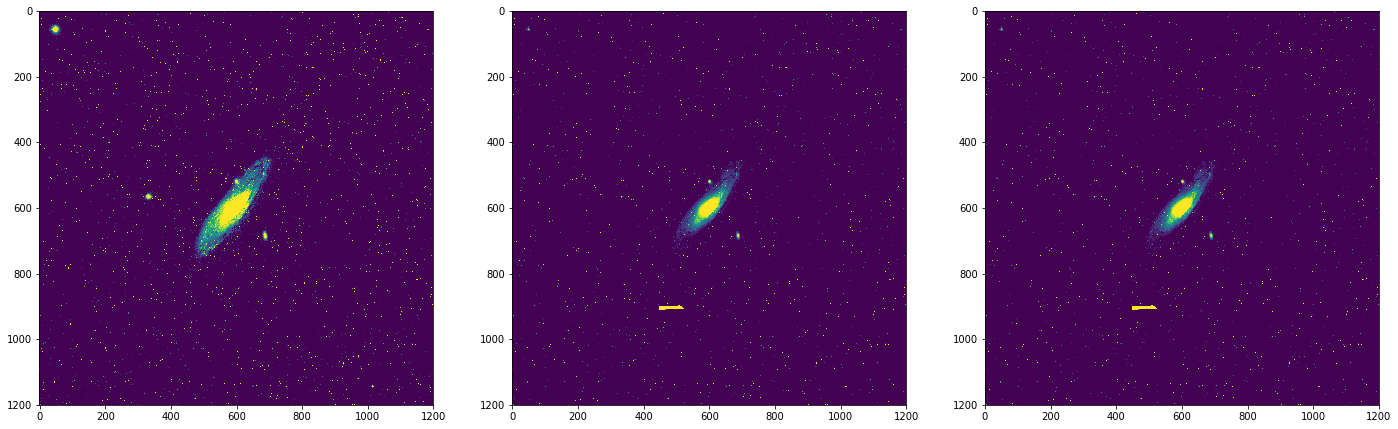

In [91]:
#lets do a quick view to see some idea what we just downloaded
#lets look at all three data 
fig,ax = plt.subplots(ncols=3,figsize=(24,8))
plot = ax[0].imshow(img[0][0].data,vmax=np.max(img[0][0].data)*.59,vmin=np.max(img[2][0].data)*.4)
plot1 = ax[1].imshow(img[1][0].data,vmax=np.max(img[1][0].data)*.59,vmin=np.max(img[1][0].data)*.3)
plot2 = ax[2].imshow(img[2][0].data,vmax=np.max(img[2][0].data)*.59,vmin=np.max(img[2][0].data)*.3)

In [92]:
#okay now lets make a 3-D image
#blue will be the DSS blue data
b = img[0][0]
#green will be the DSS Near IR data
g = img[1][0]
#red will be the DSS Red data
r = img[2][0]
#However just stacking everything is urealistic usually, but nice things have been done for us
#as we quickly can see by checking there shapes
print(b.data.shape,g.data.shape,r.data.shape)

(1200, 1200) (1200, 1200) (1200, 1200)


In [93]:
#Quickly check what is in the header
b.header

SIMPLE  =                    T / Written by SkyView Wed Jan 02 21:10:00 EST 2019
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                 1200 / Width of image                                 
NAXIS2  =                 1200 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                600.5 / X reference pixel                              
CRPIX2  =                600

In [94]:
#first lets find out the coverage in space of the images we have just set up
def coverage(dat):
    try:
       print(dat.header['CRVAL1'],dat.header['CRVAL2'],dat.header['CRVAL1']+
          dat.header['NAXIS1']*dat.header['CD1_1'],dat.header['CRVAL2']+dat.header['NAXIS2']*dat.header['CD2_2'])
#Because people love using different ways to do the same thing        
    except KeyError:
        print(b.header['CRVAL1']-(b.header['NAXIS1']-b.header['CRPIX1'])*b.header['CDELT1'],
                                                           b.header['CRVAL1']+(b.header['NAXIS1']-b.header['CRPIX1'])*b.header['CDELT1'],
                                                           b.header['CRVAL2']+(b.header['NAXIS2']-b.header['CRPIX2'])*b.header['CDELT2'],
                                                           b.header['CRVAL2']-(b.header['NAXIS2']-b.header['CRPIX2'])*b.header['CDELT2'])
#Again these are already matched so work is avoided
coverage(b)
coverage(g)
coverage(r)

13.6822 7.687199999999999 44.2663 38.2713
13.6822 7.687199999999999 44.2663 38.2713
13.6822 7.687199999999999 44.2663 38.2713


In [95]:
img

[[<astropy.io.fits.hdu.image.PrimaryHDU at 0x12cfbce10>],

img_scale : linear
img_scale : linear
img_scale : linear


/Users/rhuang/software/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


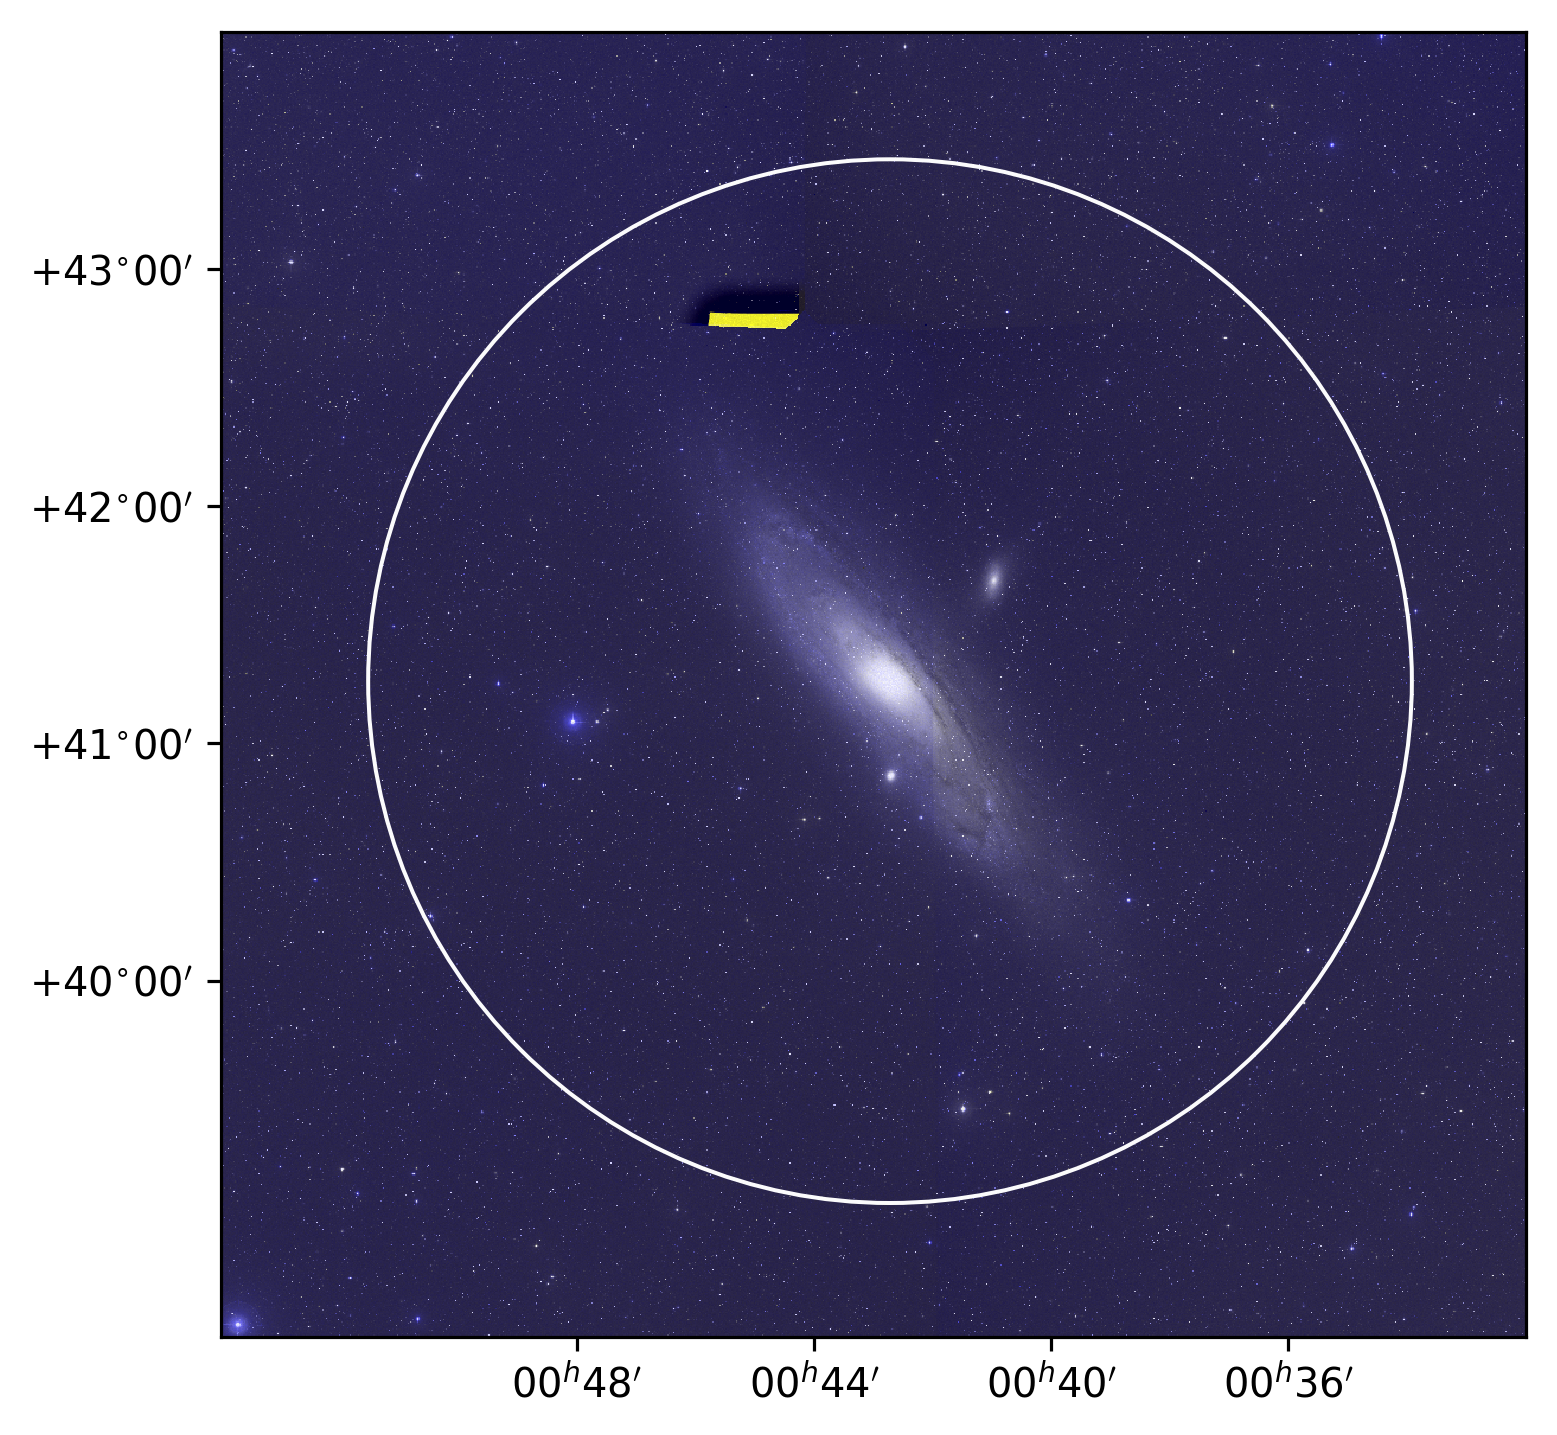

In [96]:
# from astropy.visualization import make_lupton_rgb
from astropy.wcs import WCS
#hdu = fits.open(filename)[0]
wcs = WCS(b.header)

#Do some seting up of the data so we can stack it
bi = (b.data)
ri = (r.data)
gi = (g.data)

#Rescale the data 
ri = linear(ri,scale_min=.02*np.max(ri),scale_max=.90*np.max(ri))
gi = linear(gi,scale_min=.04*np.max(gi),scale_max=.90*np.max(gi))
bi = linear(bi,scale_min=.02*np.max(bi),scale_max=.90*np.max(bi)) 
#Replace any value higher than 1 with 1 
replace = bi > 1
bi[replace] = 1
replace = gi > 1
gi[replace] = 1
replace = ri > 1
ri[replace] = 1



#Stack the Images and set up as 8-bit integers (highest value 2^8 = 256)
imgs = (np.dstack((ri,gi,bi))*255.999).astype(np.uint8)

fig, ax = plt.subplots(figsize=(6,6),dpi=72*4,)
ax.imshow(imgs,interpolation='none',aspect='equal',extent=[b.header['CRVAL1']-(b.header['NAXIS1']-b.header['CRPIX1'])*b.header['CDELT1'],
                                                           b.header['CRVAL1']+(b.header['NAXIS1']-b.header['CRPIX1'])*b.header['CDELT1'],
                                                           b.header['CRVAL2']+(b.header['NAXIS2']-b.header['CRPIX2'])*b.header['CDELT2'],
                                                           b.header['CRVAL2']-(b.header['NAXIS2']-b.header['CRPIX2'])*b.header['CDELT2']])
#fig.gca().invert_yaxis()


circle1 = plt.Circle((h.ra.degree[1], h.dec.degree[1]), 2.2, color='w',alpha = 0.99,fill=False);
ax.add_artist(circle1);

#Ultimately we would like to display the plot in hours, minutes, and seconds rather than degrees because we are people
ax.set_xticks([9,10,11,12])
ax.set_xticklabels(['00$^h$36$\'$','00$^h$40$\'$','00$^h$44$\'$','00$^h$48$\'$']) 
ax.set_yticks([40, 41, 42, 43])
ax.set_yticklabels(['+40$^{\circ}$00$\'$', '+41$^{\circ}$00$\'$', '+42$^{\circ}$00$\'$', '+43$^{\circ}$00$\'$']) 

ax.set_xlim([8.0,13.5])
ax.set_ylim([38.5,44])
ax.set_facecolor('k')
ax.invert_xaxis()
plt.grid('off')
plt.show()



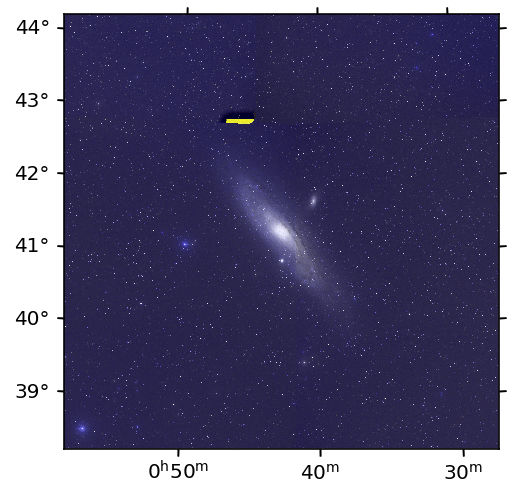

In [97]:
plt.figure(dpi=144)
plt.subplot(projection=wcs)
plt.imshow(imgs,interpolation='none',aspect='equal')
plt.show()

img_scale : linear
img_scale : linear
img_scale : linear


/Users/rhuang/software/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


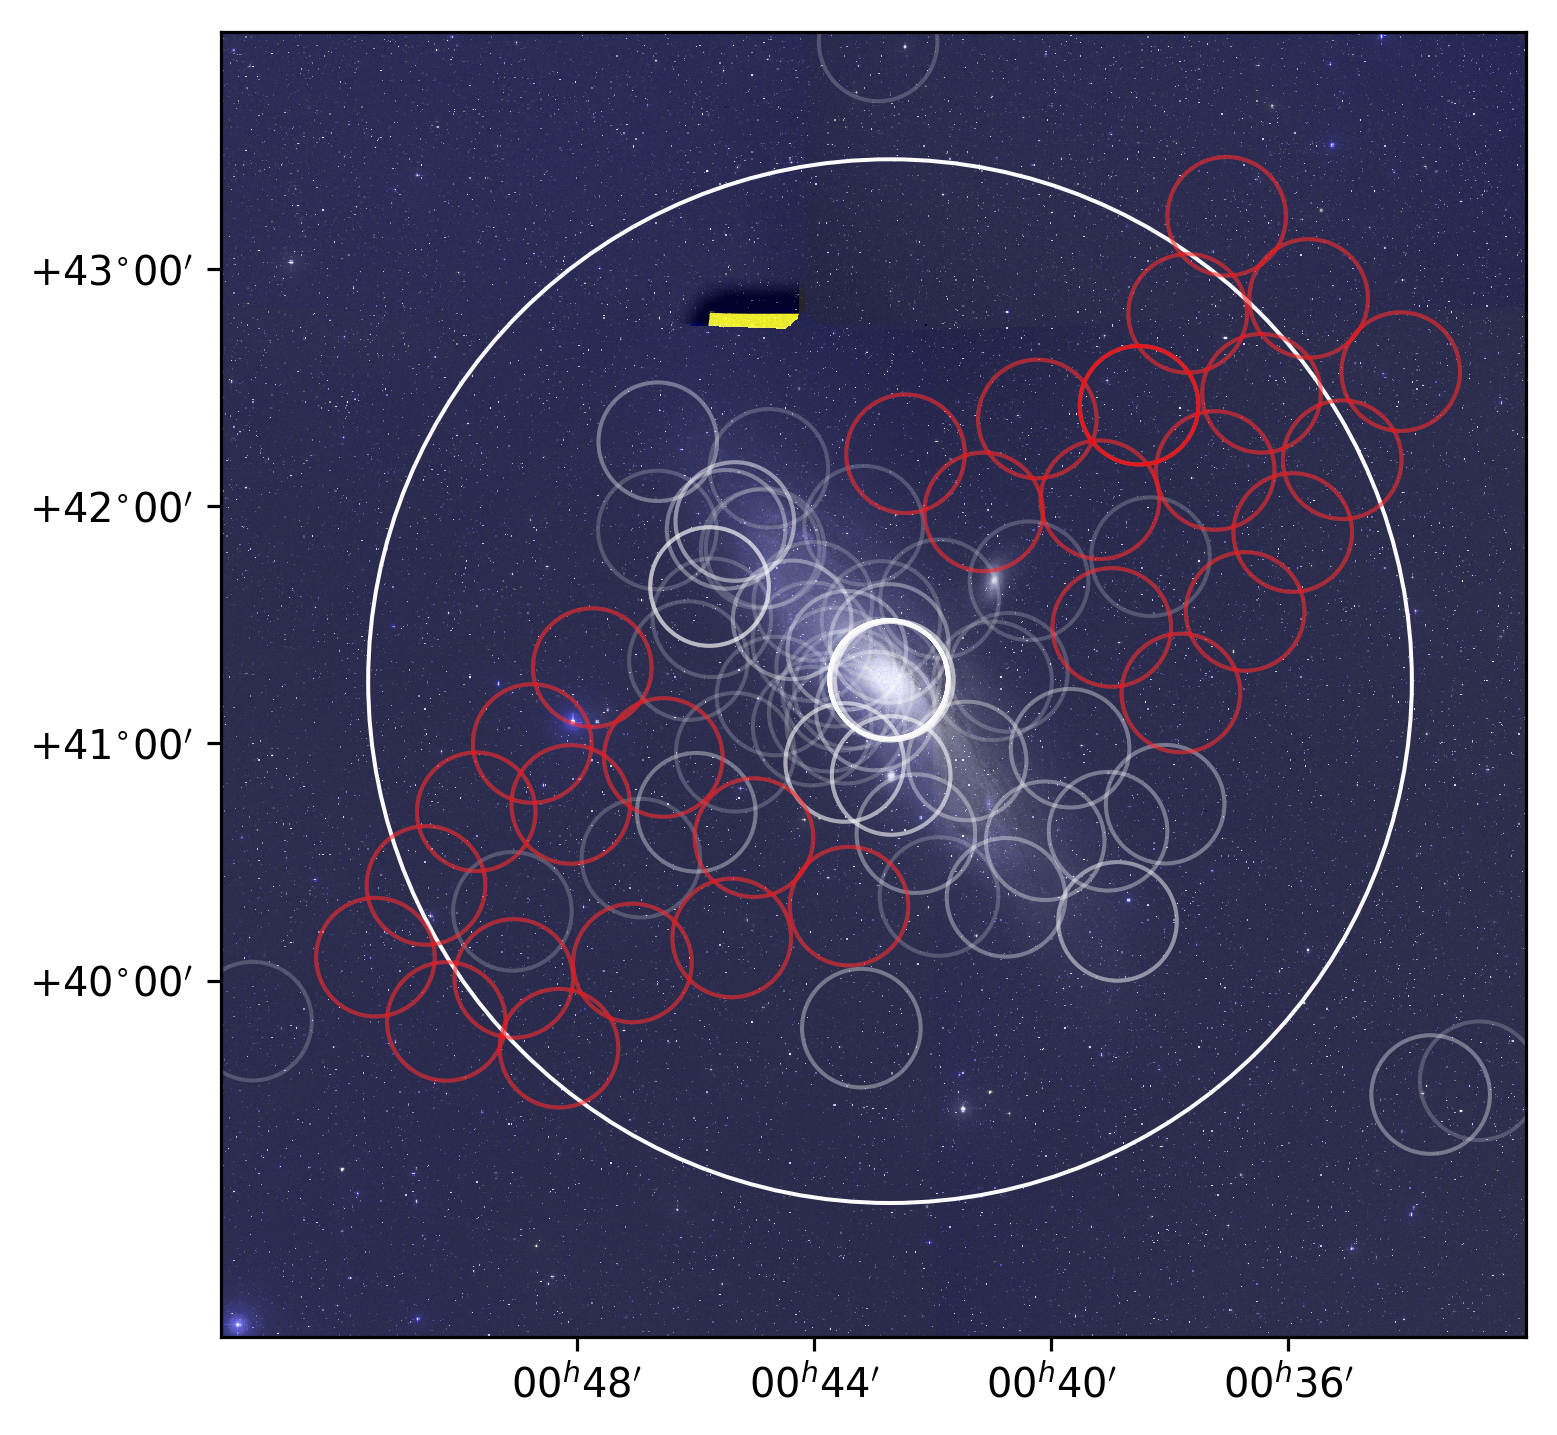

In [20]:
#Do some seting up of the data so we can stack it
bi = (b.data)
ri = (r.data)
gi = (g.data)

#Rescale the data 
ri = linear(ri,scale_min=.01*np.max(ri),scale_max=0.9*np.max(ri))
gi = linear(gi,scale_min=.01*np.max(gi),scale_max=0.9*np.max(gi))
bi = linear(bi,scale_min=.01*np.max(bi),scale_max=0.9*np.max(bi)) 
#Replace any value higher than 1 with 1 
replace = bi > 1
bi[replace] = 1
replace = gi > 1
gi[replace] = 1
replace = ri > 1
ri[replace] = 1
#Stack the Images and set up as 8-bit integers (highest value 2^8 = 256)
imgs = (np.dstack((ri,gi,bi))*255.999).astype(np.uint8)

fig, ax = plt.subplots(figsize=(6,6),dpi=72*4)
ax.set_facecolor('k')
ax.imshow(imgs,interpolation='none',aspect='equal',extent=[b.header['CRVAL1']-(b.header['NAXIS1']-b.header['CRPIX1'])*b.header['CDELT1'],
                                                           b.header['CRVAL1']+(b.header['NAXIS1']-b.header['CRPIX1'])*b.header['CDELT1'],
                                                           b.header['CRVAL2']+(b.header['NAXIS2']-b.header['CRPIX2'])*b.header['CDELT2'],
                                                           b.header['CRVAL2']-(b.header['NAXIS2']-b.header['CRPIX2'])*b.header['CDELT2']])
#fig.gca().invert_yaxis()
XMM=Table.read("/Users/rhuang/Desktop/桌面/XMM/M31/M31-3degree.csv") 
XMM['OBSERVATION.RA_NOM','OBSERVATION.DEC_NOM']
h = SkyCoord(XMM['OBSERVATION.RA_NOM'], XMM['OBSERVATION.DEC_NOM'], frame='icrs',unit='deg')
for i in range(h.ra.shape[0]):
    circle1 = plt.Circle((h.ra.degree[i], h.dec.degree[i]), 15./60., color='w',alpha = 0.2,fill=False);
    ax.add_artist(circle1);

circle1 = plt.Circle((h.ra.degree[1], h.dec.degree[1]), 2.2, color='w',alpha = 0.99,fill=False);
ax.add_artist(circle1);

XMM_Li = XMM[XMM['PROPOSAL.PI_SURNAME']=='Li']
h_li = SkyCoord(XMM_Li['OBSERVATION.RA_NOM'], XMM_Li['OBSERVATION.DEC_NOM'], frame='icrs',unit='deg')
for i in range(h_li.ra.shape[0]):
    circle1 = plt.Circle((h_li.ra.degree[i], h_li.dec.degree[i]), 15./60., color='r',alpha = 0.5,linewidth=1,linestyle='-',fill=False);
    ax.add_artist(circle1);


#Ultimately we would like to display the plot in hours, minutes, and seconds rather than degrees because we are people
ax.set_xticks([9,10,11,12])
ax.set_xticklabels(['00$^h$36$\'$','00$^h$40$\'$','00$^h$44$\'$','00$^h$48$\'$']) 
ax.set_yticks([40, 41, 42, 43])
ax.set_yticklabels(['+40$^{\circ}$00$\'$', '+41$^{\circ}$00$\'$', '+42$^{\circ}$00$\'$', '+43$^{\circ}$00$\'$']) 

ax.set_xlim([8.0,13.5])
ax.set_ylim([38.5,44])
ax.invert_xaxis()
plt.grid('off')
fig.savefig('/Users/rhuang/Desktop/桌面/XMM/M31/M31.eps')

### XMM field view

/Users/rhuang/software/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


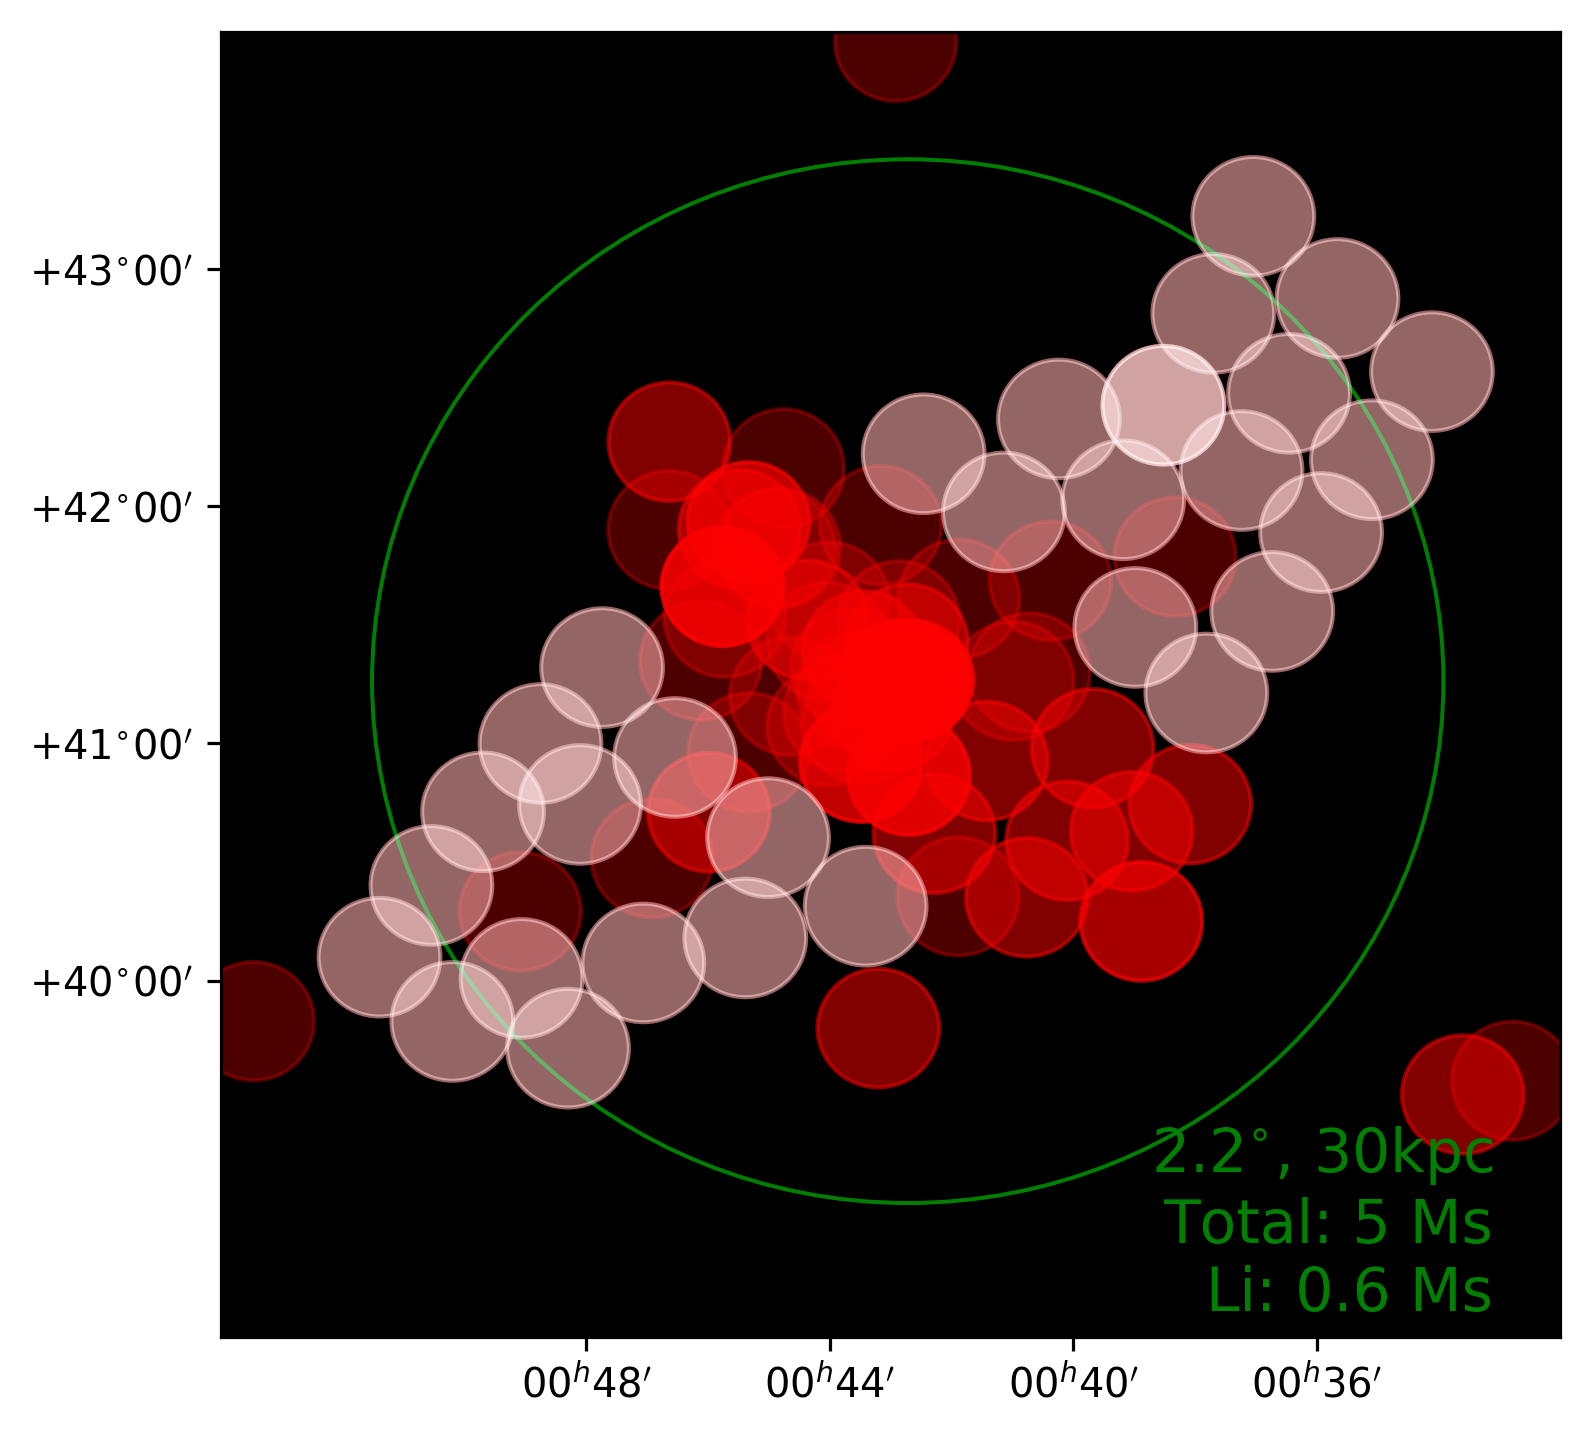

In [21]:
import numpy as np
#import astropy
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle

#import seaborn; seaborn.set()    
#plt.style.use('ggplot')

XMM=Table.read("/Users/rhuang/Desktop/桌面/XMM/M31/M31-3degree.csv") 
XMM['OBSERVATION.RA_NOM','OBSERVATION.DEC_NOM']
h = SkyCoord(XMM['OBSERVATION.RA_NOM'], XMM['OBSERVATION.DEC_NOM'], frame='icrs',unit='deg')
fig, ax = plt.subplots(figsize=(6,6),dpi=72*4)
ax.set_facecolor('k')
for i in range(h.ra.shape[0]):
    circle1 = plt.Circle((h.ra.degree[i], h.dec.degree[i]), 15./60., color='r',alpha = 0.3,linewidth=1,linestyle='-',fill=True);
    ax.add_artist(circle1);
ax.set_ylim([38,45])
ax.set_xlim([7,14])
ax.invert_xaxis()
#ax.axis('equal')
circle1 = plt.Circle((h.ra.degree[1], h.dec.degree[1]), 2.2, color='g',alpha = 0.99,fill=False);
ax.add_artist(circle1);
plt.grid('off')

XMM_Li = XMM[XMM['PROPOSAL.PI_SURNAME']=='Li']
h_li = SkyCoord(XMM_Li['OBSERVATION.RA_NOM'], XMM_Li['OBSERVATION.DEC_NOM'], frame='icrs',unit='deg')
for i in range(h_li.ra.shape[0]):
    circle1 = plt.Circle((h_li.ra.degree[i], h_li.dec.degree[i]), 15./60., color='w',alpha = 0.4,linewidth=1,linestyle='-',fill=True);
    ax.add_artist(circle1);
    
ax.set_xticks([9,10,11,12])
ax.set_xticklabels(['00$^h$36$\'$','00$^h$40$\'$','00$^h$44$\'$','00$^h$48$\'$']) 
ax.set_yticks([40, 41, 42, 43])
ax.set_yticklabels(['+40$^{\circ}$00$\'$', '+41$^{\circ}$00$\'$', '+42$^{\circ}$00$\'$', '+43$^{\circ}$00$\'$']) 
ax.set_xlim([8.0,13.5])
ax.set_ylim([38.5,44])

ax.set_xlim([8.0,13.5])
ax.set_ylim([38.5,44])
ax.invert_xaxis()
plt.grid('off')

ax.text(0.95, 0.01, '2.2$^{\circ}$, 30kpc\nTotal: 5 Ms\nLi: 0.6 Ms',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

#ax.text(0,0,'Total Exposure Time: '+str(np.sum(XMM['OBSERVATION.DURATION'])))

plt.show()

In [22]:
XMM[XMM['PROPOSAL.PI_SURNAME']=='Li']

<Table masked=True length=31>
OBSERVATION.OBSERVATION_ID ... OBSERVATION.OBSERVATION_DISTANCE_EQUATORIAL
          int64            ...                   float64                  
-------------------------- ... -------------------------------------------
                 800730101 ...                                      133.21
                 800730301 ...                                      123.93
                 800730201 ...                                      124.57
                 800730501 ...                                      100.89
                 800730401 ...                                      102.11
                 800731601 ...                                       55.68
                 800731001 ...                                       69.78
                 800730801 ...                                       81.25
                 800731501 ...                                       44.35
                 800730701 ...                                       83.95
                       ... ...                                         ...
                 800732101 ...                                       69.79
                 800732401 ...                                       86.88
                 800732301 ...                                       71.91
                 800732501 ...                                       85.53
                 800732201 ...                                        68.4
                 800732701 ...                                      104.33
                 800732601 ...                                       102.7
                 800732801 ...                                      112.72
                 800732901 ...                                      121.23
                 800733001 ...                                       120.9

### little backup

http://docs.astropy.org/en/stable/visualization/wcsaxes/

In [263]:
b,g,r.data

(<astropy.io.fits.hdu.image.PrimaryHDU at 0x156c6f160>,
 array([[ 5218. ,  4937. ,  5089. , ...,  5340.5,  5180.5,  5233.5],
        [ 4972. ,  5095. ,  4978. , ...,  5233.5,  5061.5,  5064.5],
        [ 4995. ,  5200. ,  5118. , ...,  5366.5,  5074.5,  5688.5],
        ...,
        [ 5074. ,  5327. ,  5192. , ...,  7259.5, 21298.5, 14784.5],
        [ 5201. ,  5201. ,  7765. , ...,  5233.5,  7367.5,  6983.5],
        [ 5305. ,  5849. ,  5105. , ...,  4541.5,  5252.5,  5074.5]],
       dtype=float32))

In [ ]:

import matplotlib.pyplot as plt
from astroquery.skyview import SkyView
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

# Query for SDSS g images centered on target name
hdu = SkyView.get_images("M13", survey='SDSSr')[0][0]
#hdulist = astropy.io.fits.open('/Users/rhuang/Desktop/桌面/XMM/M31/skv3187935941800.fits',hdu=0)
hdu = hdulist[0]
# Tell matplotlib how to plot WCS axes
wcs = WCS(hdu.header)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=wcs)

# Plot the image
ax.imshow(hdu.data)
ax.set(xlabel="RA", ylabel="Dec")
plt.show()

In [ ]:
b,g,r

In [ ]:
plt.hist(g.data[:],100)

KeyboardInterrupt: 

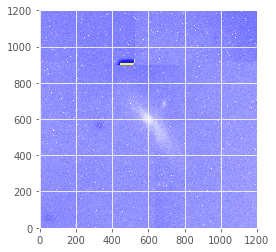

In [279]:
rgb_default = make_lupton_rgb(g.data, r.data, b.data, Q=10, stretch=0.5)
plt.imshow(rgb_default, origin='lower')
#plt.imshow(rgb_default)

## reference

plot astro image example: 
http://astroweb.case.edu/jakub/TA/Query_databases.html

figure with wcsaxes
http://docs.astropy.org/en/stable/visualization/wcsaxes/

creat rgb fiure:
http://docs.astropy.org/en/stable/visualization/rgb.html

astrometric.net is also interesting:
http://nova.astrometry.net/



## other

### NGC 660

In [52]:
img = SkyView.get_image_list(position='NGC 660',survey=['DSS2 Blue','DSS2 IR','DSS2 Red'],pixels='600,600',height=40*u.arcminute,width=40*u.arcminute,coordinates='J2000',grid=True,gridlabels=True)
img

['https://skyview.gsfc.nasa.gov/tempspace/fits/skv3593774865760_1.fits',
 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv3593774865760_2.fits',
 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv3593774865760_3.fits']

[[<astropy.io.fits.hdu.image.PrimaryHDU at 0x11a30cfd0>],

(600, 600) (600, 600) (600, 600)
img_scale : linear
img_scale : linear
img_scale : linear


Text(0.5, 1.0, 'NGC 660')

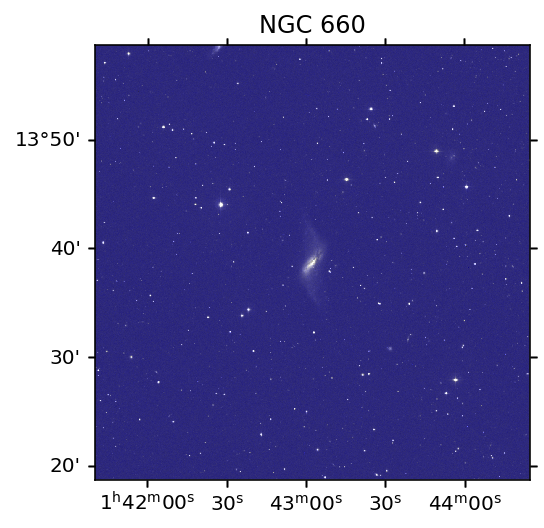

In [103]:
from astropy.io import fits
img1 = fits.open('/Users/rhuang/Desktop/桌面/XMM/NGC_660/skv3593774865760_1.fits',hdu=0)
img2 = fits.open('/Users/rhuang/Desktop/桌面/XMM/NGC_660/skv3593774865760_2.fits',hdu=0)
img3 = fits.open('/Users/rhuang/Desktop/桌面/XMM/NGC_660/skv3593774865760_3.fits',hdu=0)
img = [[img1[0]],[img3[0]],[img3[0]]]
img

from astropy.wcs import WCS

#okay now lets make a 3-D image
#blue will be the DSS blue data
b = img[0][0]
#green will be the DSS Near IR data
g = img[1][0]
#red will be the DSS Red data
r = img[2][0]
#However just stacking everything is urealistic usually, but nice things have been done for us
#as we quickly can see by checking there shapes
print(b.data.shape,g.data.shape,r.data.shape)


#Do some seting up of the data so we can stack it
bi = (b.data)
ri = (r.data)
gi = (g.data)

#Rescale the data 
ri = linear(ri,scale_min=.02*np.max(ri),scale_max=.90*np.max(ri))
gi = linear(gi,scale_min=.04*np.max(gi),scale_max=.90*np.max(gi))
bi = linear(bi,scale_min=.02*np.max(bi),scale_max=.90*np.max(bi)) 
#Replace any value higher than 1 with 1 
replace = bi > 1
bi[replace] = 1
replace = gi > 1
gi[replace] = 1
replace = ri > 1
ri[replace] = 1



#Stack the Images and set up as 8-bit integers (highest value 2^8 = 256)
imgs = (np.dstack((ri,gi,bi))*255.999).astype(np.uint8)
#fig.gca().invert_yaxis()

wcs = WCS(b.header)
plt.figure(dpi=144)
ax = plt.subplot(projection=wcs)
# ax.imshow(imgs,interpolation='none',aspect='equal',extent=[b.header['CRVAL1']-(b.header['NAXIS1']-b.header['CRPIX1'])*b.header['CDELT1'],
#                                                            b.header['CRVAL1']+(b.header['NAXIS1']-b.header['CRPIX1'])*b.header['CDELT1'],
#                                                            b.header['CRVAL2']+(b.header['NAXIS2']-b.header['CRPIX2'])*b.header['CDELT2'],
#                                                            b.header['CRVAL2']-(b.header['NAXIS2']-b.header['CRPIX2'])*b.header['CDELT2']])
ax.imshow(imgs,interpolation='none',aspect='equal')
#plt.show()

ax.set_facecolor('k')
ax.invert_xaxis()
plt.title('NGC 660')
#plt.grid('off')

In [ ]:
### NGC 2683

In [100]:
img = SkyView.get_image_list(position='NGC 2683',survey=['DSS2 Blue','DSS2 IR','DSS2 Red'],pixels='600,600',height=40*u.arcminute,width=40*u.arcminute,coordinates='J2000',grid=True,gridlabels=True)
img

['https://skyview.gsfc.nasa.gov/tempspace/fits/skv3594520282687_1.fits',
 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv3594520282687_2.fits',
 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv3594520282687_3.fits']

(600, 600) (600, 600) (600, 600)
img_scale : linear
img_scale : linear
img_scale : linear


Text(0.5, 1.0, 'NGC 2683')

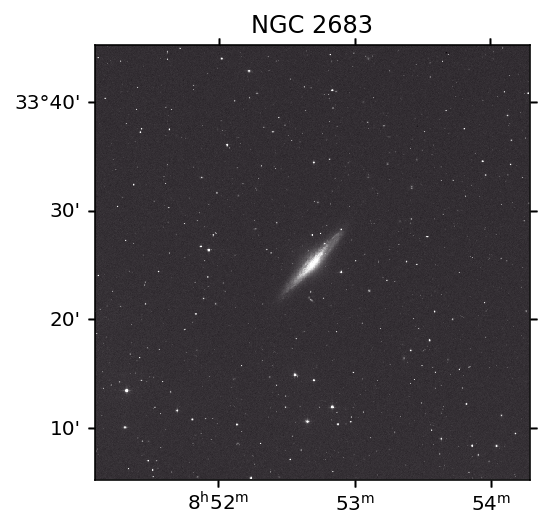

In [104]:
from astropy.io import fits
img1 = fits.open('/Users/rhuang/Desktop/桌面/XMM/NGC_2683/skv3594520282687_1.fits',hdu=0)
img2 = fits.open('/Users/rhuang/Desktop/桌面/XMM/NGC_2683/skv3594520282687_1.fits',hdu=0)
img3 = fits.open('/Users/rhuang/Desktop/桌面/XMM/NGC_2683/skv3594520282687_1.fits',hdu=0)
img = [[img1[0]],[img3[0]],[img3[0]]]
img
from astropy.wcs import WCS

#okay now lets make a 3-D image
#blue will be the DSS blue data
b = img[0][0]
#green will be the DSS Near IR data
g = img[1][0]
#red will be the DSS Red data
r = img[2][0]
#However just stacking everything is urealistic usually, but nice things have been done for us
#as we quickly can see by checking there shapes
print(b.data.shape,g.data.shape,r.data.shape)


#Do some seting up of the data so we can stack it
bi = (b.data)
ri = (r.data)
gi = (g.data)

#Rescale the data 
ri = linear(ri,scale_min=.02*np.max(ri),scale_max=.90*np.max(ri))
gi = linear(gi,scale_min=.04*np.max(gi),scale_max=.90*np.max(gi))
bi = linear(bi,scale_min=.02*np.max(bi),scale_max=.90*np.max(bi)) 
#Replace any value higher than 1 with 1 
replace = bi > 1
bi[replace] = 1
replace = gi > 1
gi[replace] = 1
replace = ri > 1
ri[replace] = 1



#Stack the Images and set up as 8-bit integers (highest value 2^8 = 256)
imgs = (np.dstack((ri,gi,bi))*255.999).astype(np.uint8)
#fig.gca().invert_yaxis()

wcs = WCS(b.header)
plt.figure(dpi=144)
ax = plt.subplot(projection=wcs)
# ax.imshow(imgs,interpolation='none',aspect='equal',extent=[b.header['CRVAL1']-(b.header['NAXIS1']-b.header['CRPIX1'])*b.header['CDELT1'],
#                                                            b.header['CRVAL1']+(b.header['NAXIS1']-b.header['CRPIX1'])*b.header['CDELT1'],
#                                                            b.header['CRVAL2']+(b.header['NAXIS2']-b.header['CRPIX2'])*b.header['CDELT2'],
#                                                            b.header['CRVAL2']-(b.header['NAXIS2']-b.header['CRPIX2'])*b.header['CDELT2']])
ax.imshow(imgs,interpolation='none',aspect='equal')
#plt.show()

ax.set_facecolor('k')
ax.invert_xaxis()
plt.title('NGC 2683')
#plt.grid('off')